# 1. Source Data
Loading Data in pandas dataframe

In [665]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [666]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as graph#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

import plotly.express as px
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125) #Just so the rows are not truncated.
from datetime import datetime

#sns.set_theme(style="ticks", color_codes=True) #set theme for seaborn


In [667]:
# Read data from 'loan.csv' 
loan = pd.read_csv('./loan.csv')

# 1a. Useful methods to be used throughout

### Utlity Methods

In [668]:

# function to plot boxplot for comparing two features
def plotBox(x, y,data, hue="loan_status",figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=x, y=y, data=data, hue=hue, order=sorted(data[x].unique()))
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()

    
# function to plot violinplot for comparing two features
def violinplot(x, y,data, hue="loan_status",figsize=(16,8)):
    plt.figure(figsize=figsize)
    sns.violinplot(x=x, y=y, data=data, hue=hue, order=sorted(data[x].unique()))
    plt.title("Violin plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
    #percentage of charged off loans as per Annual income range
    
# draw the count plot features / default ratio
def drawRatioBar(feature, data, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
    #feature_values = feature_values.sort(reverse=False)
    #plt = feature_values.plot.bar(color=sns.color_palette('husl', 8))
    plt.bar(feature_dimension, feature_values, color=sns.color_palette('husl', 8), edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
   # for p in ax.patches:
    #    plt.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.04, p.get_height()),fontweight ='bold')
    plt.show()
    
    # draw the count plot features / default ratio
def drawRatioBarwithHues(feature,hue, data, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
    plt.figure(figsize=figsize)
    sns.barplot(x=feature_dimension, y=feature_values,hue=hue, data=data)
    plt.title("Bar plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
    
    
# draw univariate with default status scale 0 - 1
def drawbarchat(x,y,data, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y=y, data=data)
    #plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def drawbarchatwithhues(x,y,hue,data, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y=y,hue=hue, data=data)
    plt.title("Bar plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def drawbarchat_old(plt,xname,yname) :
            
        xtitle = xname.title()
        ytitle = yname.title()
        
        graph_title = "Bar Chart [" + xtitle.title() + " Vs " + ytitle.title() + "]"
        
        layout = graph.Layout(
             title = graph_title,
             yaxis=dict(
                title=ytitle
             ),
             xaxis=dict(
                 title=xtitle
             )
        )

        data_to_be_plotted = [
            graph.Bar(
                x=plt[xname], 
                y=plt[yname]
            )
        ]


        figure = graph.Figure(data=data_to_be_plotted,layout=layout)
        py.offline.iplot(figure)
        
        
def drawpiechart(plt,xname,yname) : 
        
        labels = plt[xname].tolist()
        values = plt[yname].tolist()

        trace = graph.Pie(labels=labels, values=values)

        py.offline.iplot([trace])

        
def drawboxplot(dataframe) :
    data = []
    for index, column_name in enumerate(dataframe) :
        data.append(
        graph.Box(
            y=dataframe.iloc[:, index],
            name=column_name
         ))   
        
    layout = graph.Layout(
    yaxis=dict(
        title="Frequency",
        zeroline=False
    ),
       boxmode='group'
    )
    
    fig = graph.Figure(data=data, layout=layout)    
    py.offline.iplot(fig) 
    
def drawgroupbarchat(plot,col,hue) : 
    hue_col = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(plot[col].unique()) + 6 + 5*len(hue_col.unique())
    fig.set_size_inches(width , 10)
    ax = sns.countplot(data = loan_plot, x= col, order=plot[col].value_counts().index,hue = hue,palette="Set2") 
    
    for p in ax.patches:
                # Some segment wise value we are getting as Nan as respective value not present to tackle the Nan using temp_height
                temp_height = p.get_height()
                
                if math.isnan(temp_height):
                    temp_height = 0.01
                    
                
                ax.annotate('{:1.1f}%'.format((temp_height*100)/float(len(loan_plot))), (p.get_x()+0.05, temp_height+20)) 
    
    plt.show()

def checkyear(date) :
    temp = date.split('-')[1]
    lenght = len(temp)
    if lenght == 2 :
        temp = "20"+temp
    else :
        temp = "200"+temp
        
    return temp

# Method to get null count

def getnullcount(dataframe):
    return dataframe.isnull().sum()

def getnullgreaterthanpercentage(dataframe,perct):
    null_count=round(100*(getnullcount(dataframe)/len(dataframe.index)),2)
    null_count=null_count[null_count>=perct]
    return null_count
    
# Method to get Meta-Data about any dataframe passed 
def retrievemetadata(dataframe) :
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes, # data types of columns
                    'Total_Element': dataframe.count(), # total elements in columns
                    'Null_Count': dataframe.isnull().sum(), # total null values in columns
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100 # percentage of null values,
                       })
    return metadata_matrix

### Understanding Data

In [669]:
#Determining the number of rows and columns
loan.shape


(39717, 111)

In [670]:
# check first 10 lines
loan.head(10)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade                  emp_title emp_length  \
0   10.65%       162.87     B        B2                        NaN  10+ years   
1   15.27%        59.83     C        C4                      Ryder   < 1 year   
2   15.96%        84.33     C        C5                        NaN  10+ years   
3   13.49%       339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5   University Medical Group     1 year   
5    7.90%       156.46     A        A4       Veolia Transportaton    3 years   
6   15.96%       170.08     C        C5  Southern Star Photography    8 years   
7   18.64%       109.43     E        E1            MKC Accounting     9 years   
8   21.28%       152.39     F        F2                        NaN    4 years   
9   12.69%       121.45     B        B5                  Starbucks   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   
6           RENT     47004.0        Not Verified  Dec-11   Fully Paid   
7           RENT     48000.0     Source Verified  Dec-11   Fully Paid   
8            OWN     40000.0     Source Verified  Dec-11  Charged Off   
9           RENT     15000.0            Verified  Dec-11  Charged Off   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   
6          n  https://lendingclub.com/browse/loanDetail.acti...   
7          n  https://lendingclub.com/browse/loanDetail.acti...   
8          n  https://lendingclub.com/browse/loanDetail.acti...   
9          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7    Borrower added on 12/16/11 > Downpayment for...                 car   
8    Borrower added on 12/21/11

In [671]:
# describe the dataset in terms of how column values are distributed
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

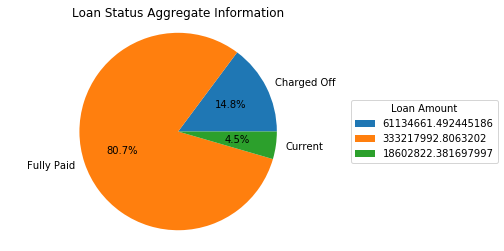

In [672]:
# plotting pie chart for different types of loan_status
chargedOffLoans = loan.loc[(loan["loan_status"] == "Charged Off")]
currentLoans = loan.loc[(loan["loan_status"] == "Current")]
fullyPaidLoans = loan.loc[(loan["loan_status"]== "Fully Paid")]
data  = [{"Charged Off": chargedOffLoans["funded_amnt_inv"].sum(), "Fully Paid":fullyPaidLoans["funded_amnt_inv"].sum(), "Current":currentLoans["funded_amnt_inv"].sum()}]
investment_sum = pd.DataFrame(data) 
chargedOffTotalSum = float(investment_sum["Charged Off"])
fullyPaidTotalSum = float(investment_sum["Fully Paid"])
currentTotalSum = float(investment_sum["Current"])
loan_status = [chargedOffTotalSum,fullyPaidTotalSum,currentTotalSum]
loan_status_labels = 'Charged Off','Fully Paid','Current'
plt.pie(loan_status,labels=loan_status_labels,autopct='%1.1f%%')
plt.title('Loan Status Aggregate Information')
plt.axis('equal')
plt.legend(loan_status,title="Loan Amount",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Observations: Charged-off % is very high i.e. 14.8%, so  we will check why it is so high

#### Null Percentage and outlier Analysis

In [673]:
# meta data for dataframe to show null percentage and types of columns
loan_metadata_matrix = retrievemetadata(loan)
loan_metadata_matrix

Datatype  Total_Element  Null_Count  \
id                                int64          39717           0   
member_id                         int64          39717           0   
loan_amnt                         int64          39717           0   
funded_amnt                       int64          39717           0   
funded_amnt_inv                 float64          39717           0   
term                             object          39717           0   
int_rate                         object          39717           0   
installment                     float64          39717           0   
grade                            object          39717           0   
sub_grade                        object          39717           0   
emp_title                        object          37258        2459   
emp_length                       object          38642        1075   
home_ownership                   object          39717           0   
annual_inc                      float64          39717           0   
verification_status              object          39717           0   
issue_d                          object          39717           0   
loan_status                      object          39717           0   
pymnt_plan                       object          39717           0   
url                              object          39717           0   
desc                             object          26777       12940   
purpose                          object          39717           0   
title                            object          39706          11   
zip_code                         object          39717           0   
addr_state                       object          39717           0   
dti                             float64          39717           0   
delinq_2yrs                       int64          39717           0   
earliest_cr_line                 object          39717           0   
inq_last_6mths                    int64          39717           0   
mths_since_last_delinq          float64          14035       25682   
mths_since_last_record          float64           2786       36931   
open_acc                          int64          39717           0   
pub_rec                           int64          39717           0   
revol_bal                         int64          39717           0   
revol_util                       object          39667          50   
total_acc                         int64          39717           0   
initial_list_status              object          39717           0   
out_prncp                       float64          39717           0   
out_prncp_inv                   float64          39717           0   
total_pymnt                     float64          39717           0   
total_pymnt_inv                 float64          39717           0   
total_rec_prncp                 float64          39717           0   
total_rec_int                   float64          39717           0   
total_rec_late_fee              float64          39717           0   
recoveries                      float64          39717           0   
collection_recovery_fee         float64          39717           0   
last_pymnt_d                     object          39646          71   
last_pymnt_amnt                 float64          39717           0   
next_pymnt_d                     object           1140       38577   
last_credit_pull_d               object          39715           2   
collections_12_mths_ex_med      float64          39661          56   
mths_since_last_major_derog     float64              0       39717   
policy_code                       int64          39717           0   
application_type                 object          39717           0   
annual_inc_joint                float64              0       39717   
dti_joint                       float64              0       39717   
verification_status_joint       float64              0       39717   
acc_now_delinq                    int64  

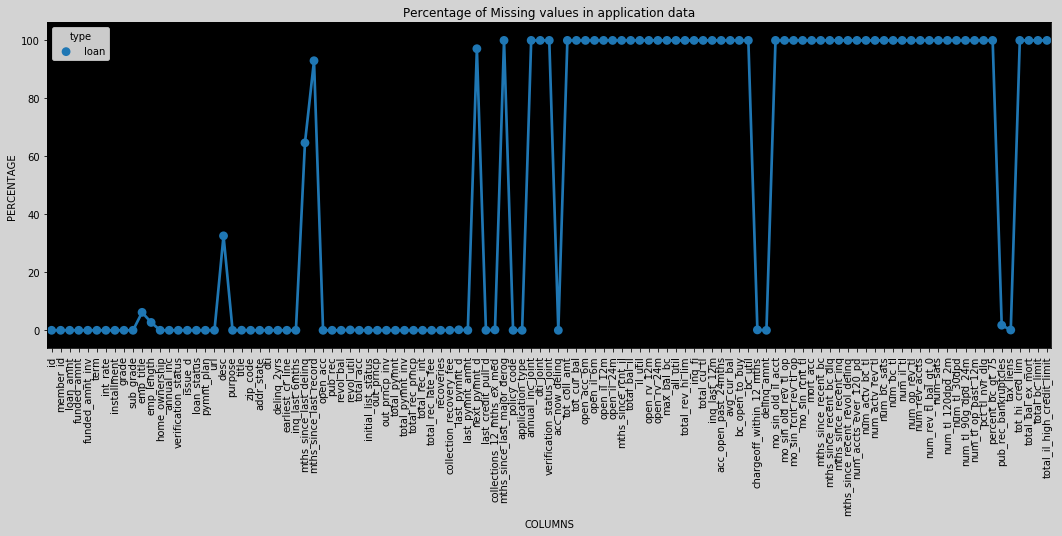

In [674]:
#Let's view the Null percentages in graph so that things become more clear

fig = plt.figure(figsize=(18,6))

miss_appdata = pd.DataFrame((loan.isnull().sum())*100/loan.shape[0]).reset_index()
miss_appdata["type"] = "loan"


ax = sns.pointplot("index",0,data=miss_appdata,hue="type")
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values in application data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [675]:
#let's check the Columns with high missing percentage >=30% (30%  value I came to after looking up  null percentage)
null_count=getnullgreaterthanpercentage(loan,30)
print(null_count)

desc                               32.58
mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m    

### Describe data to identify the outliers

In [676]:
# again check summary of all the numeric columns in the dataset
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

# 2. Data Cleaning and manipulation

### 2.a Remove columns that are completely null

In [677]:
#Removing columns where we are not getting any values i.e. 100 % null
cols_dropped=([null_count[null_count ==100.00].index])
loan.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [678]:
# check now how many columns are left
loan.shape

(39717, 57)

### Observation: 54 columns that were completely null are removed

### 2.b Remove columns having nulls greated than 30 % threshold, 30%  value I came to after looking up  null percentage)

In [679]:
getnullgreaterthanpercentage(loan,30)

desc                      32.58
mths_since_last_delinq    64.66
mths_since_last_record    92.99
next_pymnt_d              97.13
dtype: float64

In [680]:
# we can ignore Description as we don't want to do any sentimental analysis
# we can ignore next_pymnt_d as it can be driven from last_pymnt_d. This is present where date has not surpassed
# since mths_since_last_delinq , mths_since_last_record   deosn't seems to be too much related with data so dropping them as wel
Drop_col=['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']
loan.drop(labels=Drop_col,axis=1,inplace=True)

Observation: removed 4 columns that were having high % of null and are irrelevant for this study

In [681]:
#Again check Columns with high missing percentage >=30% to be sure
getnullgreaterthanpercentage(loan,30)

Series([], dtype: float64)

### Remove unnecessary columns
url -- > URL for the LC page with listing data.
zip_code -- > The first 3 numbers of the zip code provided by the borrower in the loan application.
id -- > A unique LC assigned ID for the loan listing.

In [682]:
col_to_drop = ["url","zip_code","id"]
loan.drop(col_to_drop,inplace=True,axis=1)
loan.head(5)

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0    1296599       5000         5000           4975.0   36 months   10.65%   
1    1314167       2500         2500           2500.0   60 months   15.27%   
2    1313524       2400         2400           2400.0   36 months   15.96%   
3    1277178      10000        10000          10000.0   36 months   13.49%   
4    1311748       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade                 emp_title emp_length  \
0       162.87     B        B2                       NaN  10+ years   
1        59.83     C        C4                     Ryder   < 1 year   
2        84.33     C        C5                       NaN  10+ years   
3       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan         purpose                 title addr_state    dti  \
0          n     credit_card              Computer         AZ  27.65   
1          n             car                  bike         GA   1.00   
2          n  small_business  real estate business         IL   8.72   
3          n           other              personel         CA  20.00   
4          n           other              Personal         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0     83.70%          9                   f       0.00           0.00   
1      9.40%          4                   f       0.00           0.00   
2     98.50%         10                   f       0.00           0.00   
3        21%         37                   f       0.00           0.00   
4     53.90%         38                   f     524.06         524.06   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3513.330000          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       May-16   

   last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0           171.62             May-16                         0.0   
1           119.66             Sep-13                         0.0   
2           649.91             May-16                         0.0   
3           357.48             Apr-16                         0.0   
4            67.79             May-16                         0.0   

   policy_code application_type  a

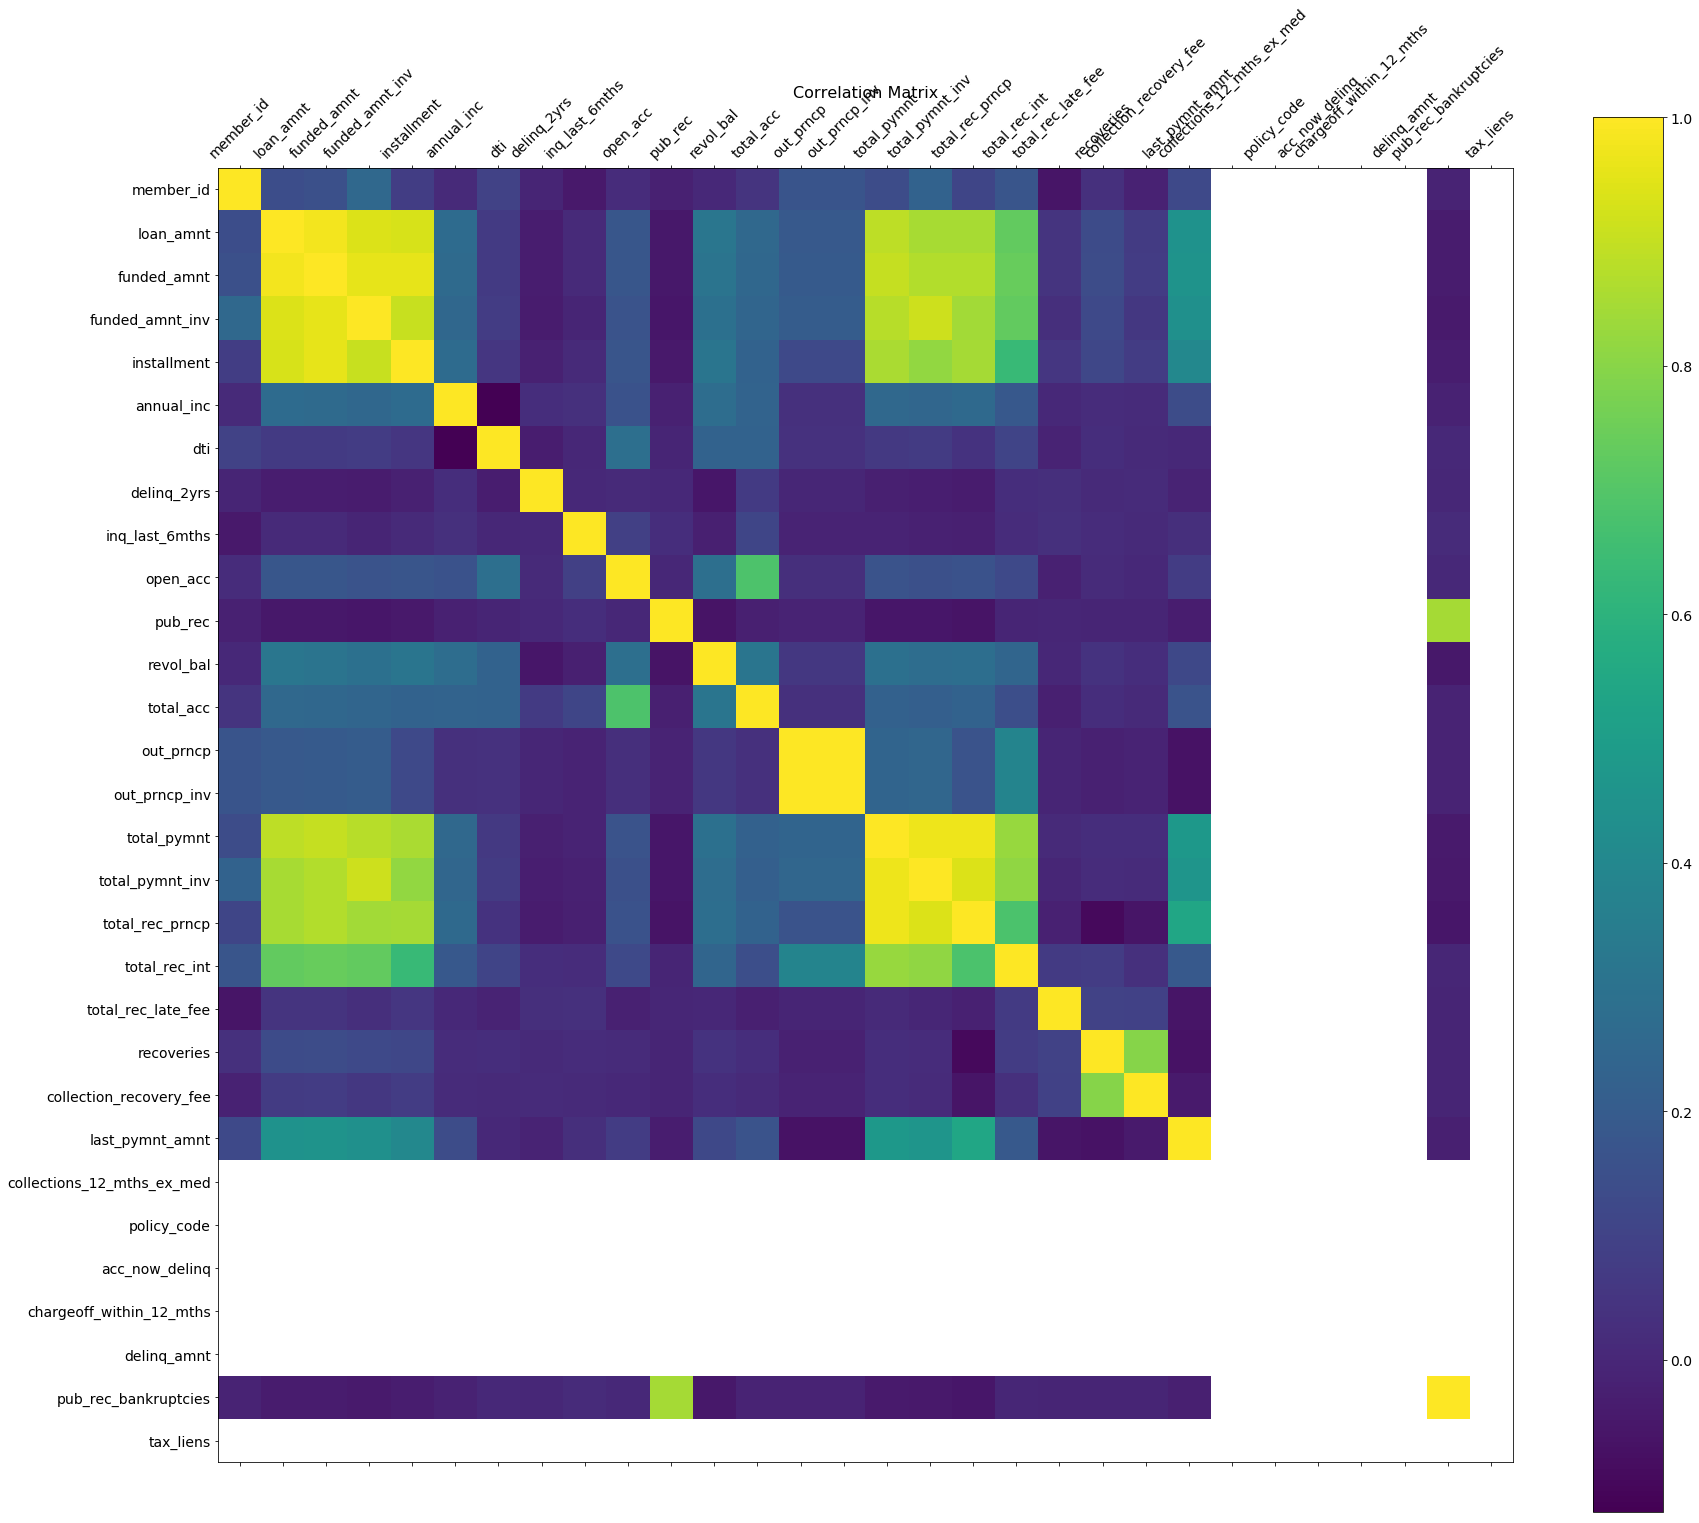

In [683]:
#Check corelation between variables to remove some of corelated columns to remove bias 
f = plt.figure(figsize=(29, 25))
plt.matshow(loan.corr(), fignum=f.number)
plt.xticks(range(loan.select_dtypes(['number']).shape[1]), loan.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(loan.select_dtypes(['number']).shape[1]), loan.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
#plt.matshow(loan.corr())
#plt.show()

### Observation: From above corelation matrix it is clear that loan_amt is highly correlated with funded_amnt,funded_amnt_inv
### hence we can drop funded_amnt_inv
### Similarly total_pymnt,total_pymnt_inv ,total_rec_prncp are highly correlated so we can drop total_pymnt_inv ,total_rec_prncp

In [684]:
col_to_drop = ["total_pymnt_inv","total_rec_prncp","funded_amnt_inv"]
loan.drop(col_to_drop,inplace=True,axis=1)
loan.shape

(39717, 47)

In [685]:
loan.shape

(39717, 47)

### Fixing the values of columns where we need to do analysis

In [686]:
#Check different type of application_type
print(loan["application_type"].unique())

['INDIVIDUAL']


In [687]:
#emp_lenth is relevant column we need to fix it so that we can use it for further analysis
print(loan["emp_length"].unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [688]:
#replace nan to unknown value as we don't know the exact reason why it is missing
loan["emp_length"].fillna('UnKnown',inplace=True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' 'UnKnown']


### Standardize values for further analysis

In [689]:
# update loan_status to numeric values as it becomes easier to plot graph and do analysis i.e. Fully Paid to 0 and Charged Off to 1 and Current as 2
loan["loan_status_original"] = loan["loan_status"]
loan["loan_status"] = loan["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else (1 if x == "Charged Off"  else 2))
print(loan["loan_status"].unique())

# remove text data from term feature and store as numerical
loan["term"] = pd.to_numeric(loan["term"].apply(lambda x:x.split()[0]))



[0 1 2]


# 4. Adding derived metrices

In [690]:
# adding Loan to income ratio, because this can combine two columns to one
loan['loantoIncomeratio']=loan['loan_amnt']/loan['annual_inc']
loan[['loantoIncomeratio','loan_amnt','annual_inc']].head()

loantoIncomeratio  loan_amnt  annual_inc
0           0.208333       5000     24000.0
1           0.083333       2500     30000.0
2           0.195886       2400     12252.0
3           0.203252      10000     49200.0
4           0.037500       3000     80000.0

### Do Binning of numerical variables

In [691]:
### Binning Numerical variables to categories

# create bins for loan_amnt range
bins = [0, 4000, 8000, 12000, 16000, 20000, 24000]
bucket_l = ['0-4000', '4000-8000', '8000-12000', '12000-16000', '16000-20000','20000+']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=bucket_l)
# create bins for int_rate range

loan["int_rate"] = pd.to_numeric(loan["int_rate"].apply(lambda x:x.split('%')[0]))
bins = [0,2.5,5.0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-2.5','2.5-5.0','5.0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=bucket_l)
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=bucket_l)



In [692]:
##issue_d
# Year in which the loan was funded
loan['issue_d_Year'] = pd.to_datetime(loan['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))).dt.strftime('%Y')

In [693]:
##issue_d
#  month which the loan was funded
loan['issue_d_Month'] = pd.to_datetime(loan['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))).dt.strftime('%b')

In [694]:
#check range of loan amount
drawboxplot(pd.DataFrame(loan["loan_amnt"])) # hover cursor above graph

### Observation: Quarterile between 25 and 75 for loan_amnt is 5500 to 15000

In [695]:
#check range of annual income
drawboxplot(pd.DataFrame(loan["annual_inc"])) # hover cursor above graph

### Observation:#Not sure why 25-75 quartile is so skewed for annual income probably outliers, let's plot scatter plot to find out more insights how it is distributed

In [696]:

# x and y given as array_like objects
fig = px.scatter(x=loan["member_id"], y=loan["annual_inc"])
fig.show()

### Observations: Clearly outliers are not allowing the box plot graph to be plotted and also this will distrupt analysis so better to remove outliers

### Remove outliers

In [697]:
#Remove the outlier
outlier_value = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < outlier_value]

In [698]:
#Redraw box plot
#check range of annual income
drawboxplot(pd.DataFrame(loan["annual_inc"])) # hover cursor above graph

### Observations: annual Income is between the range 40K to 82K for (25-75 quartile)

In [699]:
#describe data again to identify more outliers
loan.describe()

member_id     loan_amnt   funded_amnt          term      int_rate  \
count  3.949400e+04  39494.000000  39494.000000  39494.000000  39494.000000   
mean   8.505935e+05  11176.823695  10907.412518     42.413531     12.012076   
std    2.657334e+05   7416.142278   7148.554898     10.620462      3.720441   
min    7.069900e+04    500.000000    500.000000     36.000000      5.420000   
25%    6.669182e+05   5500.000000   5375.000000     36.000000      9.250000   
50%    8.511155e+05  10000.000000   9600.000000     36.000000     11.830000   
75%    1.047368e+06  15000.000000  15000.000000     60.000000     14.540000   
max    1.314167e+06  35000.000000  35000.000000     60.000000     24.590000   

        installment     annual_inc   loan_status           dti   delinq_2yrs  \
count  39494.000000   39494.000000  39494.000000  39494.000000  39494.000000   
mean     323.282328   66378.257586      0.199347     13.356071      0.145845   
std      207.502299   37413.212327      0.465929      6.664136      0.490766   
min       15.690000    4000.000000      0.000000      0.000000      0.000000   
25%      166.592500   40000.000000      0.000000      8.230000      0.000000   
50%      279.760000   58776.000000      0.000000     13.450000      0.000000   
75%      428.500000   81996.000000      0.000000     18.620000      0.000000   
max     1305.190000  294000.000000      2.000000     29.990000     11.000000   

       inq_last_6mths      open_acc       pub_rec      revol_bal  \
count    39494.000000  39494.000000  39494.000000   39494.000000   
mean         0.867347      9.284626      0.055249   13264.298957   
std          1.068111      4.393541      0.237596   15620.665148   
min          0.000000      2.000000      0.000000       0.000000   
25%          0.000000      6.000000      0.000000    3694.000000   
50%          1.000000      9.000000      0.000000    8826.000000   
75%          1.000000     12.000000      0.000000   16965.000000   
max          8.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  total_rec_int  \
count  39494.000000  39494.000000   39494.000000  39494.000000   39494.000000   
mean      22.043880     51.308018      51.068738  12102.093610    2252.394508   
std       11.375462    375.646291     374.292865   8985.288316    2590.916432   
min        2.000000      0.000000       0.000000      0.000000       0.000000   
25%       13.000000      0.000000       0.000000   5569.368120     660.762500   
50%       20.000000      0.000000       0.000000   9862.788695    1343.810000   
75%       29.000000      0.000000       0.000000  16477.967128    2819.237500   
max       90.000000   6311.470000    6307.370000  58563.679930   23563.680000   

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count        39494.000000  39494.000000             39494.000000   
mean             1.360732     95.082339                12.302709   
std              7.281352    686.757530               147.018164   
min              0.000000      0.000000                 0.000000   
25%              0.000000      0.000000                 0.000000   
50%              0.000000      0.000000                 0.000000   
75%              0.000000      0.000000                 0.000000   
max            180.200000  29623.350000              7002.190000   

       last_pymnt_amnt  collections_12_mths_ex_med  policy_code  \
count     39494.000000                     39438.0      39494.0   
mean       2665.294725                         0.0          1.0   
std        4425.370638                         0.0          0.0   
min           0.000000                         0.0          1.0   
25%         218.072500                         0.0          1.0   
50%         543.420000                         0.0          1.0   
75%        3278.755000                         0.0          1.0   
max       36115.200000                         0.0          1.0   

       acc_now_de

### Removing more outliers by looking at the quartile vs max/min values

In [700]:
# open_acc, the max value is 44 whereas  75% quantile value is 12, and is 5 times the mean
#remomve outliers from open_acc
open_acc_q = loan["open_acc"].quantile(0.999)
loan = loan[loan["open_acc"] < open_acc_q]
# total_acc, the max value is 90 where 75% quantile value is 29, and is 4 times the mean
#remomve outliers from total_acc 
total_acc_q = loan["total_acc"].quantile(0.98)
loan = loan[loan["total_acc"] < total_acc_q]
# pub_rec, the max value is 4 where 75% quantile value is 0, and is 4 times the mean
#remomve outliers from pub_rec
pub_rec_q = loan["pub_rec"].quantile(0.995)
loan = loan[loan["pub_rec"] <= pub_rec_q]

In [701]:
loan.head(10)


member_id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0    1296599       5000         5000    36     10.65       162.87     B   
1    1314167       2500         2500    60     15.27        59.83     C   
2    1313524       2400         2400    36     15.96        84.33     C   
3    1277178      10000        10000    36     13.49       339.31     C   
4    1311748       3000         3000    60     12.69        67.79     B   
5    1311441       5000         5000    36      7.90       156.46     A   
6    1304742       7000         7000    60     15.96       170.08     C   
7    1288686       3000         3000    36     18.64       109.43     E   
8    1306957       5600         5600    60     21.28       152.39     F   
9    1306721       5375         5375    60     12.69       121.45     B   

  sub_grade                  emp_title emp_length home_ownership  annual_inc  \
0        B2                        NaN  10+ years           RENT     24000.0   
1        C4                      Ryder   < 1 year           RENT     30000.0   
2        C5                        NaN  10+ years           RENT     12252.0   
3        C1        AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4        B5   University Medical Group     1 year           RENT     80000.0   
5        A4       Veolia Transportaton    3 years           RENT     36000.0   
6        C5  Southern Star Photography    8 years           RENT     47004.0   
7        E1            MKC Accounting     9 years           RENT     48000.0   
8        F2                        NaN    4 years            OWN     40000.0   
9        B5                  Starbucks   < 1 year           RENT     15000.0   

  verification_status issue_d  loan_status pymnt_plan             purpose  \
0            Verified  Dec-11            0          n         credit_card   
1     Source Verified  Dec-11            1          n                 car   
2        Not Verified  Dec-11            0          n      small_business   
3     Source Verified  Dec-11            0          n               other   
4     Source Verified  Dec-11            2          n               other   
5     Source Verified  Dec-11            0          n             wedding   
6        Not Verified  Dec-11            0          n  debt_consolidation   
7     Source Verified  Dec-11            0          n                 car   
8     Source Verified  Dec-11            1          n      small_business   
9            Verified  Dec-11            1          n               other   

                                   title addr_state    dti  delinq_2yrs  \
0                               Computer         AZ  27.65            0   
1                                   bike         GA   1.00            0   
2                   real estate business         IL   8.72            0   
3                               personel         CA  20.00            0   
4                               Personal         OR  17.94            0   
5  My wedding loan I promise to pay back         AZ  11.20            0   
6                                   Loan         NC  23.51            0   
7                        Car Downpayment         CA   5.35            0   
8   Expand Business & Buy Debt Portfolio         CA   5.55            0   
9            Building my credit history.         TX  18.08            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648     83.70%   
1           Apr-99               5         3        0       1687      9.40%   
2           Nov-01               2         2        0       2956     98.50%   
3           Feb-96               1        10        0       5598        21%   
4           Jan-96               0        15        0      27783     53.90%   
5           Nov-04               3         9        0       7963     28.30%   
6           Jul-05               1         7        0      17726     

# 5. Perform Univariant Analysis

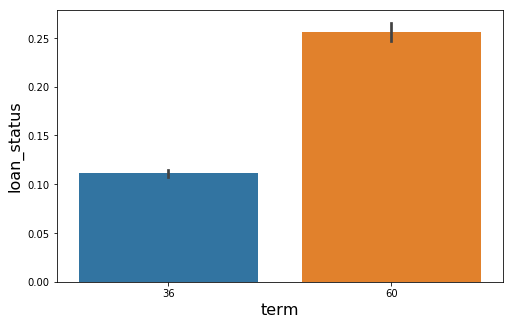

In [702]:
# check for defaulters wrt term in the data using countplot exclude the one that are current
drawbarchat("term","loan_status",loan[loan['loan_status']!= 2], figsize=(8,5))
#drawbarchat(loan[loan['loan_status']!= 2],"term","loan_status")

### Observation: Higher the term, higher are the chances of loan default

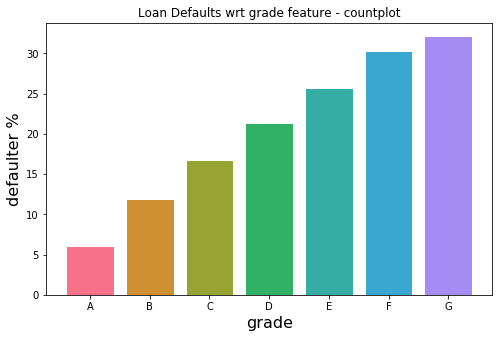

In [703]:
# check for defaulters wrt grade in the data using countplot
drawRatioBar("grade",loan, figsize=(8,5))

### As grade increase default ratio increases as well

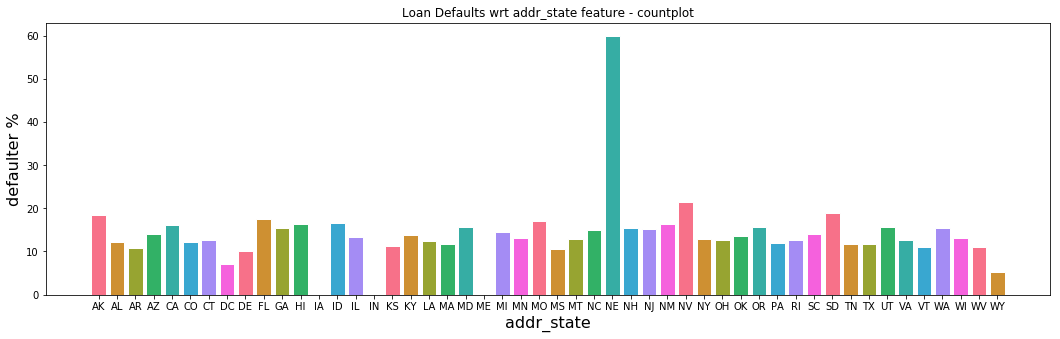

In [704]:
# check for defaulters wrt grade in the data using countplot
drawRatioBar("addr_state",loan, figsize=(18,5))

### Observation: Loan default ratio is very high in state of NE  ,hence risky to give loans in NE but let's diagnose further if any particular segment in NE state is problematic


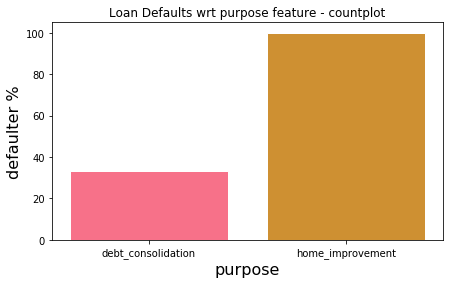

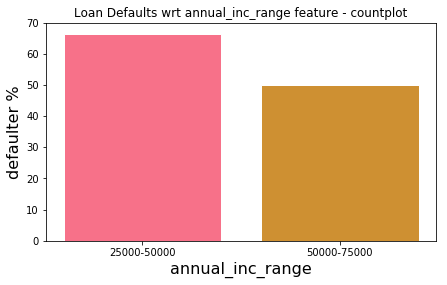

In [705]:
# check for defaulters wrt grade in the data using countplot
drawRatioBar("purpose",loan[(loan['loan_status']!= 2) & (loan["addr_state"]=='NE')], figsize=(7,4))
drawRatioBar("annual_inc_range",loan[(loan['loan_status']!= 2) & (loan["addr_state"]=='NE')], figsize=(7,4))


#drawRatioBar("addr_state",loan[(loan['loan_status'] == 1) & (loan["addr_state"] == 'NE')], figsize=(18,5))
# plot box for loan_status vs int_rate for each purpose
#plotBox("loan_status", "int_rate",loan[(loan['loan_status']== 1) & (loan["addr_state"]=='NE')], hue="purpose")
#drawbarchatwithhues("purpose", "int_rate", "loan_status", loan[(loan['loan_status']== 1) & (loan["addr_state"]=='NE')],figsize=(20,5))

### In state of NE default ratio is very high where  loan is taken for home improvement

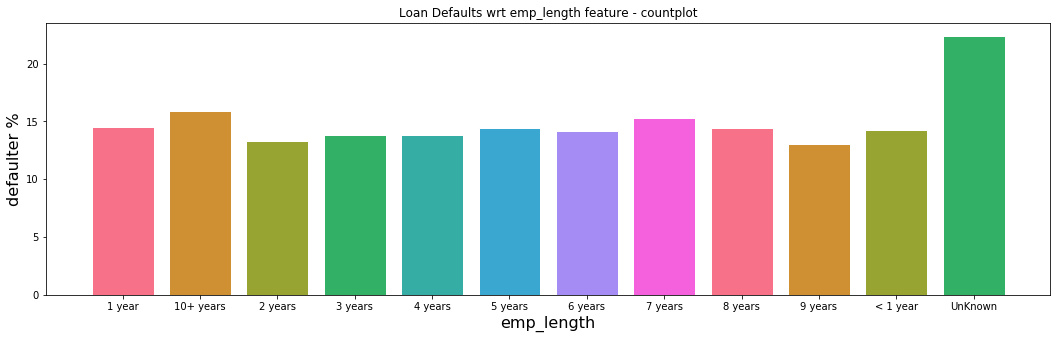

In [706]:
#Check impact of emp_length wrt to default ratio
drawRatioBar("emp_length",loan[(loan['loan_status']!= 2)], figsize=(18,5))

### Observations: Default % is very high is person is umemployed or doing it's own business

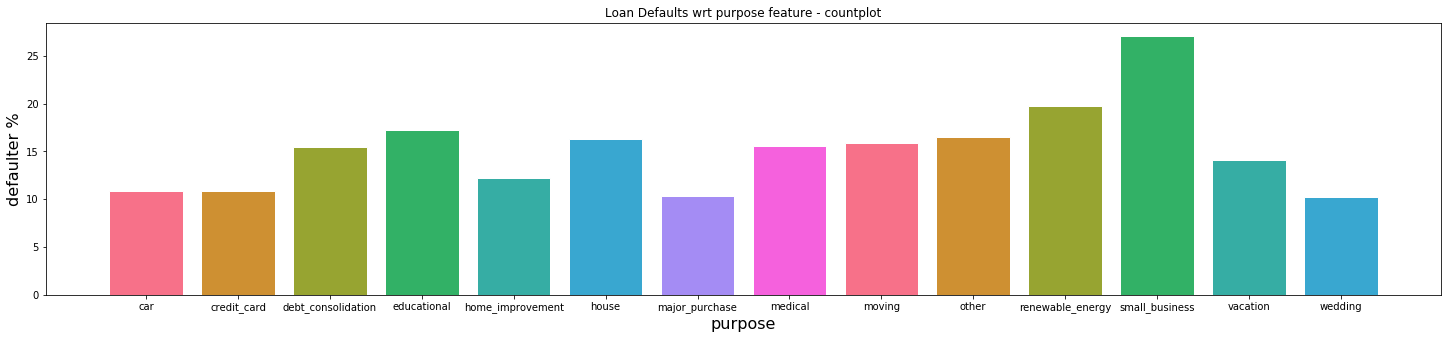

In [707]:
drawRatioBar("purpose",loan[(loan['loan_status']!= 2)], figsize=(25,5))

Observations: Default % is high when loan is taken for small businesses

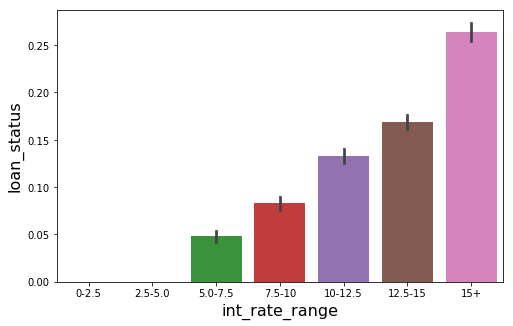

In [708]:
# check for defaulters wrt int_rate_range in the data
drawbarchat("int_rate_range","loan_status",loan[loan['loan_status']!= 2], figsize=(8,5))

### As interest rate increases loan default increases but if it is > 15 then there is significant rise in loan default

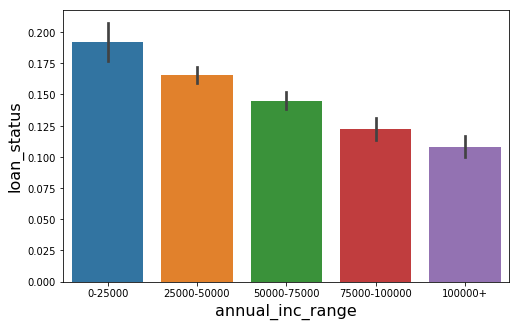

In [709]:
# check for defaulters wrt annual_inc_range in the data
drawbarchat("annual_inc_range","loan_status",loan[loan['loan_status']!= 2], figsize=(8,5))

### Observations: As annual income increases loan default decreases

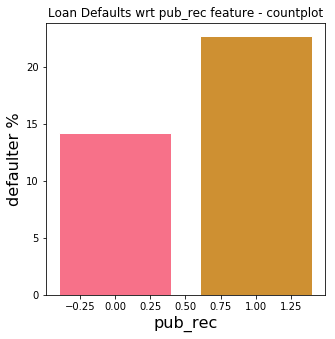

In [710]:
#percentage of charged off for Public derogatory records
drawRatioBar("pub_rec",loan[(loan['loan_status']!= 2)], figsize=(5,5))

### Observation: Default ratio is high if person has derogatory public record

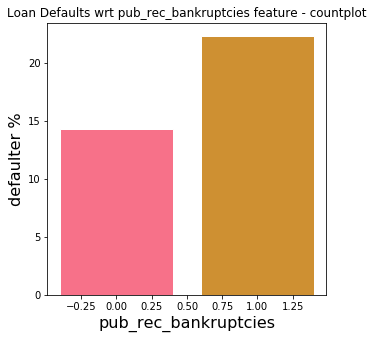

In [711]:
#percentage of charged off for Public derogatory records
drawRatioBar("pub_rec_bankruptcies",loan[(loan['loan_status']!= 2)], figsize=(5,5))

### Observations: Borrower with bankruptcies record have high percentage of charged off.

In [712]:
#Export to csv to do more analysis offline
loan.to_csv('loan_filtered.csv')

# 6. Do Multivariate Analysis

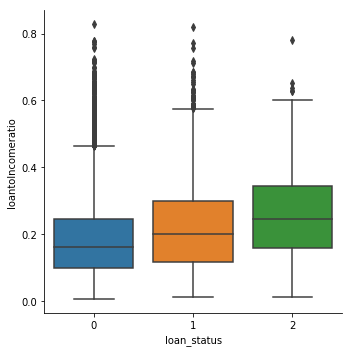

In [713]:
#drawbarchat(loan,"loan_status","loantoIncomeratio")
# x and y given as array_like objects
#fig = px.scatter(x=loan["loan_status"], y=loan["loantoIncomeratio"])
#fig.show()

sns.catplot(x="loan_status", y="loantoIncomeratio", kind="box", data=loan)

### Observation: Looking at loantoincome ratio, it seems current open loan has high loan to income ratio so are more risky. Fully paid loans have low loan to income ratio, So Bank is doing more riskier loans currently

In [714]:

plot_loan_status = loan.groupby("loan_status")
plot_loan_status.head()
#drawbarchat(plot_loan_status,"loan_status","addr_state")

member_id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0     1296599       5000         5000    36     10.65       162.87     B   
1     1314167       2500         2500    60     15.27        59.83     C   
2     1313524       2400         2400    36     15.96        84.33     C   
3     1277178      10000        10000    36     13.49       339.31     C   
4     1311748       3000         3000    60     12.69        67.79     B   
5     1311441       5000         5000    36      7.90       156.46     A   
6     1304742       7000         7000    60     15.96       170.08     C   
8     1306957       5600         5600    60     21.28       152.39     F   
9     1306721       5375         5375    60     12.69       121.45     B   
12    1298717       9000         9000    36     13.49       305.38     C   
14    1303503      10000        10000    36     10.65       325.74     B   
32    1299514      10000        10000    60     15.96       242.97     C   
39    1304237      12500        12500    60     12.69       282.44     B   
86    1297940      14000        14000    60     17.27       349.98     D   
95    1303001      15300        15300    60     22.06       423.10     F   

   sub_grade                                 emp_title emp_length  \
0         B2                                       NaN  10+ years   
1         C4                                     Ryder   < 1 year   
2         C5                                       NaN  10+ years   
3         C1                       AIR RESOURCES BOARD  10+ years   
4         B5                  University Medical Group     1 year   
5         A4                      Veolia Transportaton    3 years   
6         C5                 Southern Star Photography    8 years   
8         F2                                       NaN    4 years   
9         B5                                 Starbucks   < 1 year   
12        C1       Va. Dept of Conservation/Recreation   < 1 year   
14        B2                                     SFMTA    3 years   
32        C5                          US Legal Support    2 years   
39        B5  United States Infrastructure Corporation     1 year   
86        D3             community colleges of spokane    4 years   
95        F4                                      OSSI    6 years   

   home_ownership  annual_inc verification_status issue_d  loan_status  \
0            RENT     24000.0            Verified  Dec-11            0   
1            RENT     30000.0     Source Verified  Dec-11            1   
2            RENT     12252.0        Not Verified  Dec-11            0   
3            RENT     49200.0     Source Verified  Dec-11            0   
4            RENT     80000.0     Source Verified  Dec-11            2   
5            RENT     36000.0     Source Verified  Dec-11            0   
6            RENT     47004.0        Not Verified  Dec-11            0   
8             OWN     40000.0     Source Verified  Dec-11            1   
9            RENT     15000.0            Verified  Dec-11            1   
12           RENT     30000.0     Source Verified  Dec-11            1   
14           RENT    100000.0     Source Verified  Dec-11            1   
32           RENT     29120.0            Verified  Dec-11            2   
39           RENT     27000.0            Verified  Dec-11            2   
86           RENT     28000.0            Verified  Dec-11            2   
95           RENT     85000.0            Verified  Dec-11            2   

   pymnt_plan             purpose                                  title  \
0           n         credit_card                               Computer   
1           n                 car                                   bike   
2           n      small_business                   real estate business   
3           n               other                               personel   
4           n               other                               Personal   
5           n             wedding  My wed

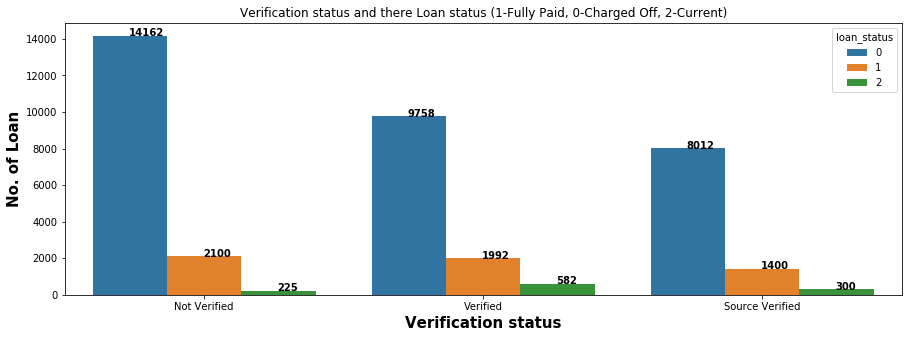

In [715]:
#Number of loan given as per the verifiaction of borrower annual income and there loan status.
plt.figure(figsize=(15,5))
ax=sns.countplot(x=loan['verification_status'],hue=loan['loan_status'],order=loan['verification_status'].value_counts().index)
plt.xlabel('Verification status',fontweight ='bold',fontsize = 15)
plt.ylabel('No. of Loan',fontweight ='bold',fontsize = 15)
plt.title('Verification status and there Loan status (1-Fully Paid, 0-Charged Off, 2-Current)')
for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.13, p.get_height()),fontweight ='bold')

### Observation: Most Loan are given without verifying the Annual income but it doesn't play a significant role in defaults

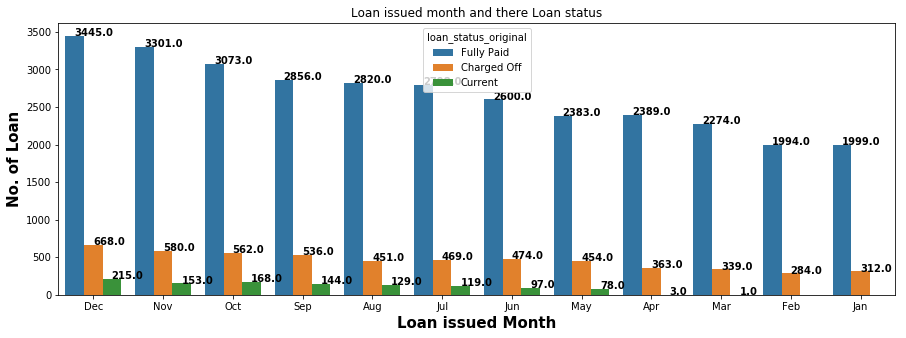

In [716]:
#Number of loan as per month and there loan status
plt.figure(figsize=(15,5))
ax=sns.countplot(x=loan['issue_d_Month'],hue=loan['loan_status_original'])
plt.xlabel('Loan issued Month',fontweight ='bold',fontsize = 15)
plt.ylabel('No. of Loan',fontweight ='bold',fontsize = 15)
plt.title('Loan issued month and there Loan status')
for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.13, p.get_height()),fontweight ='bold')
        
## plot loan defaults check what happens in last quarter, may be sales person coming under pressure

### Observation: High % of  loans granted in Q4 (Dec,Nov, and Oct)

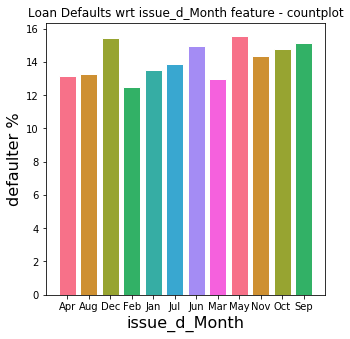

In [717]:
#percentage of charged off for Public derogatory records
#drawRatioBar("pub_rec_bankruptcies",loan[(loan['loan_status']!= 2)], figsize=(5,5))
drawRatioBar("issue_d_Month",loan, figsize=(5,5))

### Observation: Most of the loan taken in Q4 (Dec,Nov, and Oct) and default ratio is also high for these months. Probably Sales person are giving more loans in last quarter for meeting sales target.

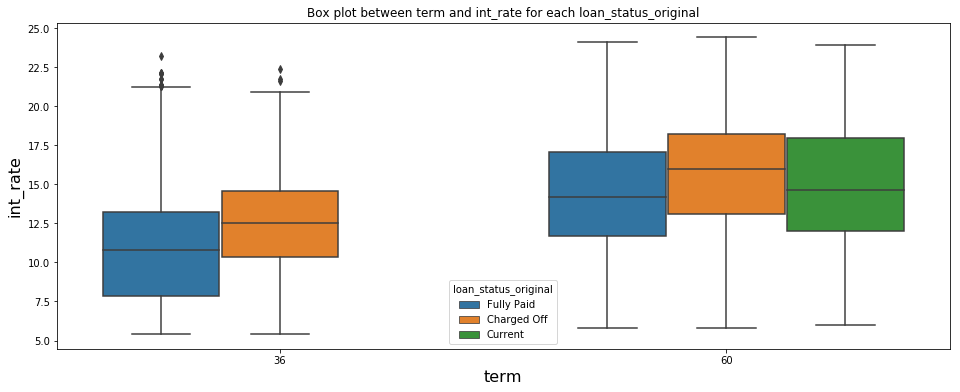

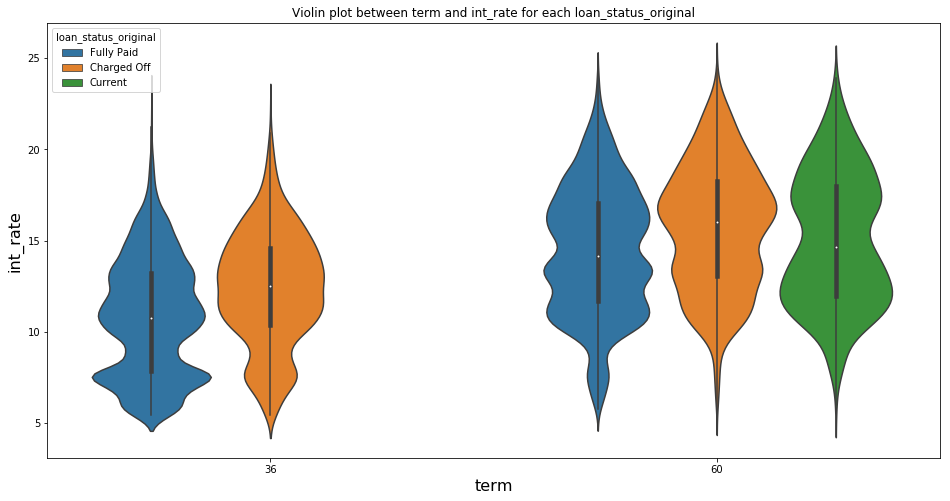

In [718]:

# plot box for term vs int_rate for each loan_status
plotBox("term", "int_rate",loan,"loan_status_original")
violinplot("term", "int_rate",loan,"loan_status_original")

### Observations: Looking at box plot, higher the term , higher is the interest rate. But within same term, changes of loan failing is higher with higher interest rate
### In voilin chart, for 36 months term there is high density in lower than median for loans that are fully paid while in charged off loans high density is above median
### Similarly in 60 months as term there is propotionate density around median for loans that are fully paid while in charged off loans high density is above median

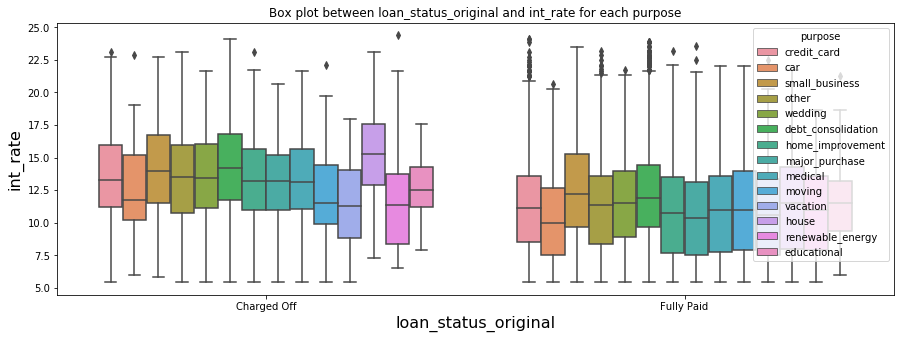

In [719]:
# plot box for loan_status vs int_rate for each purpose
plotBox("loan_status_original", "int_rate",loan[loan['loan_status']!= 2], hue="purpose",figsize=(15,5))


### Observations: For charged off loans int rate is very high for loans taken on house

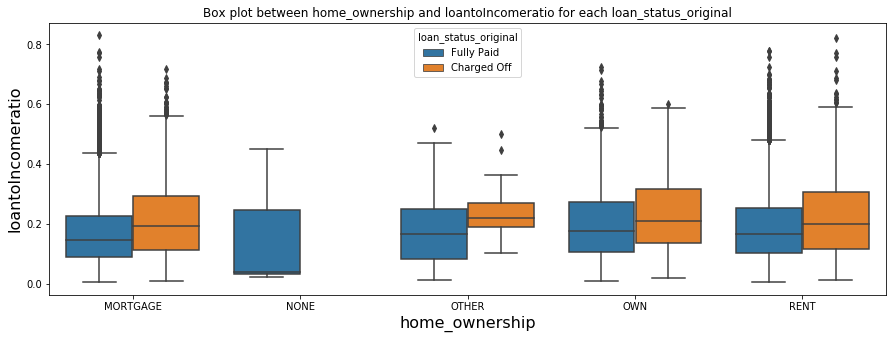

In [720]:
# plot box for loan_status vs int_rate for each purpose
plotBox("home_ownership", "loantoIncomeratio",loan[loan['loan_status']!= 2], hue="loan_status_original",figsize=(15,5))

### Observations: No particular insight can be drawn from above chart wrt home_ownership and loantoincome ratio

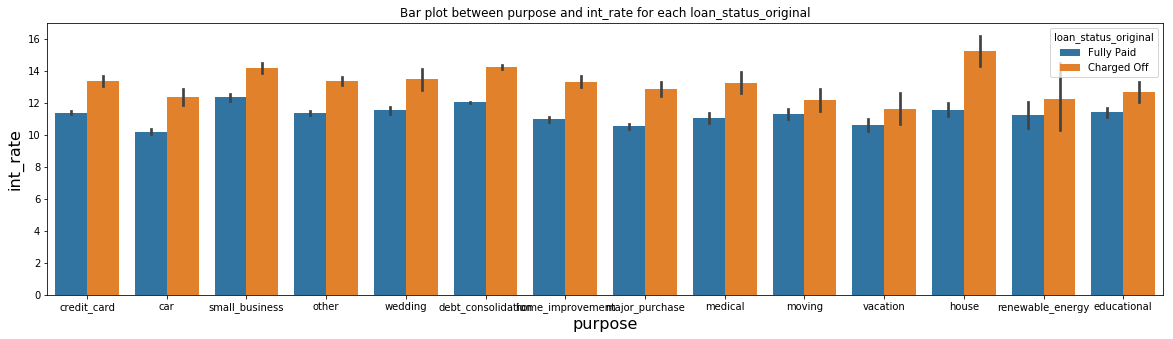

In [721]:
drawbarchatwithhues("purpose", "int_rate", "loan_status_original", loan[loan['loan_status']!= 2],figsize=(20,5))

### Observations: Where loan is taken for house % of charged of loans is high

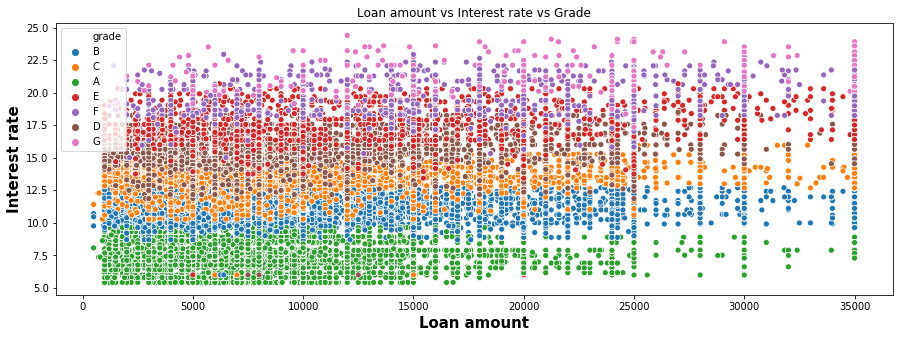

In [722]:
#Loan amount vs Interest rate vs Grade
plt.figure(figsize=(15,5)) 
sns.scatterplot(x=loan['loan_amnt'],y=loan['int_rate'],hue=loan['grade'])
plt.xlabel('Loan amount',fontweight ='bold',fontsize = 15)
plt.ylabel('Interest rate',fontweight ='bold',fontsize = 15)
plt.title('Loan amount vs Interest rate vs Grade')
plt.show()

In [723]:
### Observations: clearly interest rate offered to the customer is a function of their grade 